## homework_1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

from statsmodels.graphics import tsaplots
from statsmodels.stats import diagnostic
from statsmodels.tsa.stattools import adfuller

from load_dataset import Dataset

In [2]:
dataset = Dataset('../data/dataset/')

###  1. Для чего нужно понятие стационарности в анализе временных рядов?

Понятие стационарности вводится, чтобы задать самый базовый тип временного ряда (значения не зависят от времени, матошидание и дисперсия постоянны). Те наша задача при анализе временного ряда попытаться свести его к стационарному, если это получилось, то мы уже не сможем получить еще более простую структуру (те всю информацию мы уже извлекли)

### 2. Рассмотрите картинку data/images/ts_types.png.

- a) Назовите ряды с гетероскедастичностью : a, c, e, f, g, h
- b) Какие ряды имеют сезонность? g, h
- c) Какие ряды имеют цикличность? a, d
- d) Какие ряды можно приблизить моделью интегрированного ряда? e, i
- e) Какие ряды можно считать стационарными? b

### 3.  Рассмотрите один из графиков индекса Доу-Джонса (data/dataset/dow_jones.csv) Предположим, вы можете сделать только одно преобразование ряда, чтобы сделать его стационарным. Какое преобразование вы выберете и почему? Сделайте это преобразование,  проверьте, получили ли вы белый шум

In [3]:
dow_jones = dataset['dow_jones_0.csv']

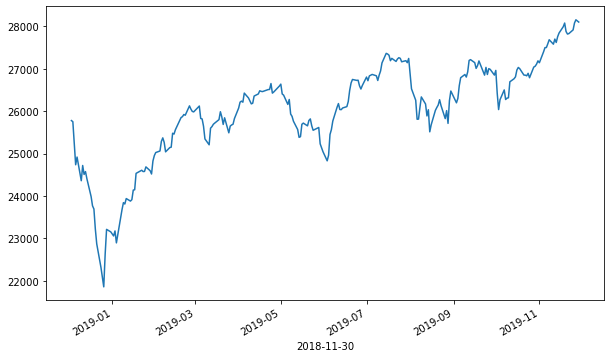

In [5]:
dow_jones.plot(figsize=(10,6));

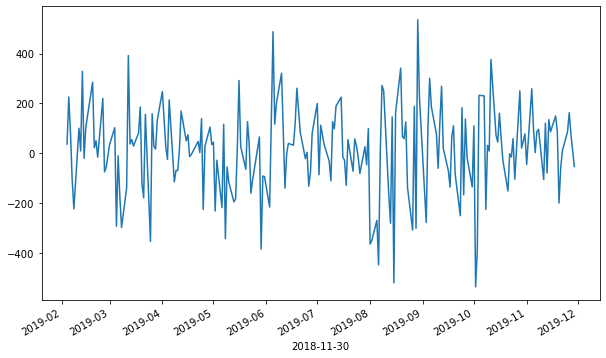

In [6]:
# Дифференцирование ряда
dow_jones_diff = dow_jones['2019-02':].diff()
dow_jones_diff.plot(figsize=(10,6));

In [7]:
# попробуем обрезать выбросы
p_value = adfuller(dow_jones_diff.dropna())[1]
p_value

1.2400457010272866e-24

In [ ]:
# Можно отвергнуть нулевую гипотезу, что ряд нестационарный

### 4. Рассмотрите ряд data/dataset/stl_example.csv. Постройте для него график автокорреляций. Обьясните закономерности, которые вы видите.

In [8]:
stl = dataset['stl_example.csv']

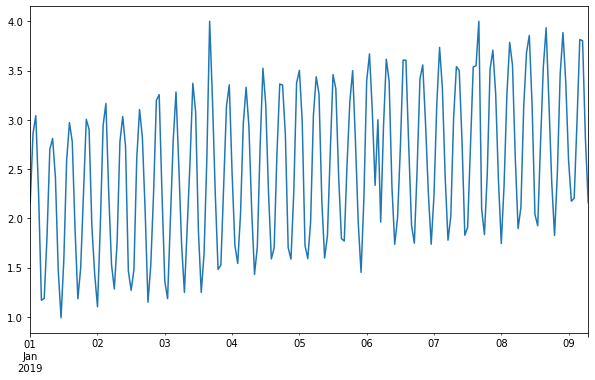

In [9]:
stl.plot(figsize=(10,6));

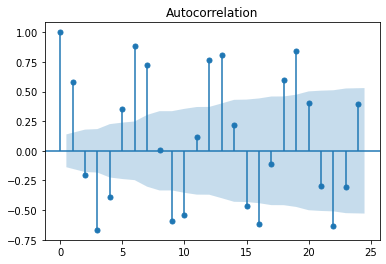

In [10]:
tsaplots.plot_acf(stl);

In [ ]:
# на графике можно увидеть сезонность (периодичность 6), на исходном также можно увидеть тренд.
# Продифференцировав два раза, можно ожидать стационарный ряд

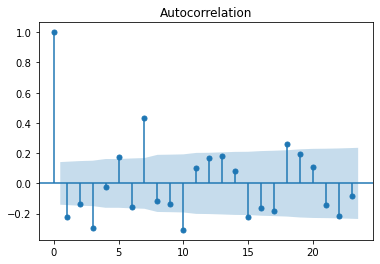

In [11]:
tsaplots.plot_acf(stl.diff().diff(6).dropna());

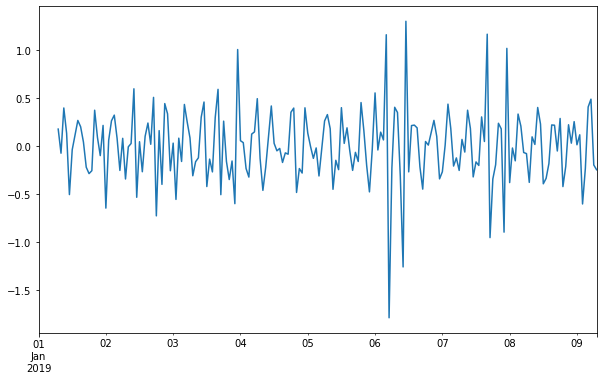

In [13]:
stl_stac = stl.diff().diff(6)
stl_stac.plot(figsize=(10,6));

In [14]:
p_value = adfuller(stl_stac.dropna())[1]
p_value

4.728845378198928e-19

In [58]:
# Можно отвергнуть нулевую гипотезу, что ряд нестационарный

### 5. необходимо написать функцию get_seasonal_period(), которая бы автоматически определяла период сезонных временных рядов, использую автокорреляционную функцию

In [15]:
def get_seasonal_period(t_series, thresh=0.2):
    L = len(t_series)
    n_season = []
    for l in range(1, L//2):
        autocorr = t_series.autocorr(l)
        if autocorr > 1 - thresh and not any([l % n == 0  for n in n_season]):
            n_season.append(l)
    return n_season

In [16]:
a = get_seasonal_period(stl.diff())

In [17]:
a

[6, 13, 19, 25, 44, 63, 69, 82, 94]